## PVT <a class="anchor" id="pvt"></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set1")

data_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/'
results_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/'

In [131]:
cr = pd.read_csv('/Volumes/schnyer/Megan/Wearables/results/cr_cosinor_df.csv', skiprows=1)
cr.columns = ['subject', 'actmin_7', 'amp_7', 'alpha_7', 'beta_7', 'phi_7', 'device']
cr['subject'] = cr['subject'].str.slice(2, -3)
npar = pd.read_csv('/Volumes/schnyer/Megan/Wearables/results/cr_nonpar_df.csv')
npar['subject'] = npar['subject'].astype(str)
rc = pd.read_csv('/Volumes/schnyer/Megan/Wearables/data/survey/demographic/WearableAssessment-Validation_DATA_2021-01-29_1236.csv')
rc = rc[rc['redcap_event_name'] == 'online_eligibility_arm_1']
rc['subject'] = rc['record_id']
rc['subject'][rc['age_group'] == 1.0] = '1' + rc['record_id'].astype(str).str.pad(4, fillchar='0')
rc['subject'][rc['age_group'] != 1.0] = '2' + rc['record_id'].astype(str).str.pad(4, fillchar='0')
rc

pvt = pd.read_csv(data_dir + 'PVT/pvt_results.csv')
pvt['subject'] = pvt['subject'].astype(str)

df = pd.merge(rc, cr[cr['device'] == 'Actiwatch'], on='subject', how='outer')
df = pd.merge(df, cr[cr['device'] == 'Fitbit'], on='subject', suffixes=('', '_fit'))
df = pd.merge(df, npar[npar['device'] == 'Actiwatch'], on='subject', how='outer')
df = pd.merge(df, npar[npar['device'] == 'Fitbit'], on='subject', suffixes=('', '_fit'))
df = pd.merge(df, pvt, on='subject')
df = df.drop_duplicates(subset='subject', keep='first').drop(columns = ['device_y', 'device', 'selected_devices___1', 'selected_devices___2', 'selected_devices___3', 'selected_devices___4', 'redcap_event_name', 'record_id'])
df.to_csv('/Volumes/schnyer/Megan/Wearables/dataset_2021-11-04.csv')

print(df.shape[1])
df

/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_12973/165627012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['subject'][rc['age_group'] == 1.0] = '1' + rc['record_id'].astype(str).str.pad(4, fillchar='0')
/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_12973/165627012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['subject'][rc['age_group'] != 1.0] = '2' + rc['record_id'].astype(str).str.pad(4, fillchar='0')


76


,age_group,handedness,gender,ethnicity___1,ethnicity___2,ethnicity___3,ethnicity___4,ethnicity___5,ethnicity___6,global_psqi,...,L5_start_fit,L5_fit,M10_start_fit,M10_fit,date,location,RT,FS,NR,Group
0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"[(4, 56, 0)]",0.000261,"[(16, 37, 0)]",0.094548,2019-10-24,lab,0.287571,0.0,0.0,Young Adults
2,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.102290,2019-10-18,lab,0.292187,3.0,0.0,Young Adults
3,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,...,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.104364,2019-11-11,lab,0.343802,6.0,0.0,Young Adults
4,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,"[(9, 18, 0)]",0.011392,"[(21, 45, 0)]",0.099281,2019-11-11,lab,0.295579,2.0,0.0,Young Adults
5,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,"[(6, 1, 0)]",0.002202,"[(22, 13, 0)]",0.086375,2019-11-05,lab,0.286903,1.0,0.0,Young Adults
6,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,"[(8, 43, 0)]",0.000222,"[(19, 27, 0)]",0.084381,2019-12-05,lab,0.245413,1.0,0.0,Young Adults
7,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,...,"[(4, 48, 0)]",0.000180,"[(18, 29, 0)]",0.096920,2019-11-07,lab,0.343700,0.0,0.0,Young Adults
8,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,"[(8, 7, 0)]",0.000353,"[(19, 7, 0)]",0.105987,2020-02-07,lab,0.267186,1.0,0.0,Young Adults
9,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,"[(6, 7, 0)]",0.000526,"[(17, 47, 0)]",0.082852,2020-01-22,lab,0.270828,2.0,0.0,Young Adults
10,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,...,"[(5, 42, 0)]",0.000452,"[(20, 39, 0)]",0.057371,2020-01-27,lab,0.316575,1.0,0.0,Young Adults


In [84]:
df.head()

,age_group,handedness,gender,ethnicity___1,ethnicity___2,ethnicity___3,ethnicity___4,ethnicity___5,ethnicity___6,global_psqi,...,L5_start_fit,L5_fit,M10_start_fit,M10_fit,date,location,RT,FS,NR,Group
0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"[(4, 56, 0)]",0.000261,"[(16, 37, 0)]",0.094548,2019-10-24,lab,0.287571,0.0,0.0,Young Adults
2,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.102290,2019-10-18,lab,0.292187,3.0,0.0,Young Adults
3,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,...,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.104364,2019-11-11,lab,0.343802,6.0,0.0,Young Adults
4,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,"[(9, 18, 0)]",0.011392,"[(21, 45, 0)]",0.099281,2019-11-11,lab,0.295579,2.0,0.0,Young Adults
5,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,"[(6, 1, 0)]",0.002202,"[(22, 13, 0)]",0.086375,2019-11-05,lab,0.286903,1.0,0.0,Young Adults


In [90]:
df['RT'] = np.where(df['RT'] > 1, df['RT']/1000, df['RT'])

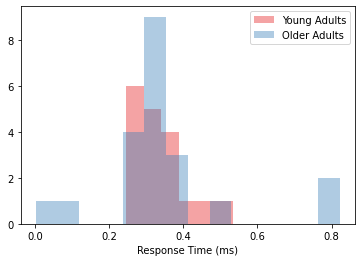

In [108]:
sns.distplot(df[df['Group'] == 'Young Adults']['RT'], label = 'Young Adults', kde=False)
sns.distplot(df[df['Group'] == 'Older Adults']['RT'], label = 'Older Adults', kde=False)
plt.xlabel('Response Time (ms)')
plt.legend()
plt.savefig(results_dir + 'pvt_rt.png', dpi=300)

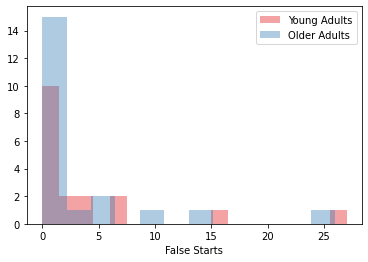

In [109]:
sns.distplot(df[df['Group'] == 'Young Adults']['FS'], label = 'Young Adults', kde=False)
sns.distplot(df[df['Group'] == 'Older Adults']['FS'], label = 'Older Adults', kde=False)
plt.xlabel('False Starts')
plt.legend()
plt.savefig(results_dir + 'pvt_fs.png', dpi=300)

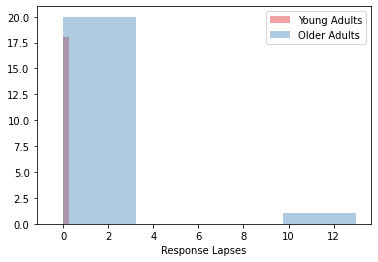

In [110]:
sns.distplot(df[df['Group'] == 'Young Adults']['NR'], label = 'Young Adults', kde=False)
sns.distplot(df[df['Group'] == 'Older Adults']['NR'], label = 'Older Adults', kde=False)
plt.xlabel('Response Lapses')
plt.legend()
plt.savefig(results_dir + 'pvt_nr.png', dpi=300)

In [113]:
df0 = df.copy()
print(df0.shape[1])
df = df[df['NR'] < 4]
print(df.shape[1])

76
76


In [151]:
df.columns

Index(['age_group', 'handedness', 'gender', 'ethnicity___1', 'ethnicity___2',
       'ethnicity___3', 'ethnicity___4', 'ethnicity___5', 'ethnicity___6',
       'global_psqi', 'actiwatch_arm', 'bed_time', 'fall_asleep', 'wake_time',
       'hours_bed', 'hours_slept', 'tr_sleep_30', 'tr_wakeup',
       'tr_use_bathroom', 'tr_breathing', 'tr_snoring', 'tr_too_cold',
       'tr_too_hot', 'tr_dreams', 'tr_pain', 'other_sleep', 'other_explain',
       'sleep_medication', 'trouble_staying_awake', 'sleep_enthusiasm',
       'sleep_quality', 'component_one', 'fall_asleep_raw',
       'sleep_latency_raw', 'component_two', 'component_three',
       'sleep_efficiency', 'component_four', 'sleep_disruption_raw',
       'component_five', 'component_six', 'sleep_dysfunction_raw',
       'component_seven', 'subject', 'actmin_7', 'amp_7', 'alpha_7', 'beta_7',
       'phi_7', 'device_x', 'actmin_7_fit', 'amp_7_fit', 'alpha_7_fit',
       'beta_7_fit', 'phi_7_fit', 'device_fit', 'IS', 'IV', 'RA', 'L5_star

<AxesSubplot:xlabel='phi_7_fit', ylabel='RT'>

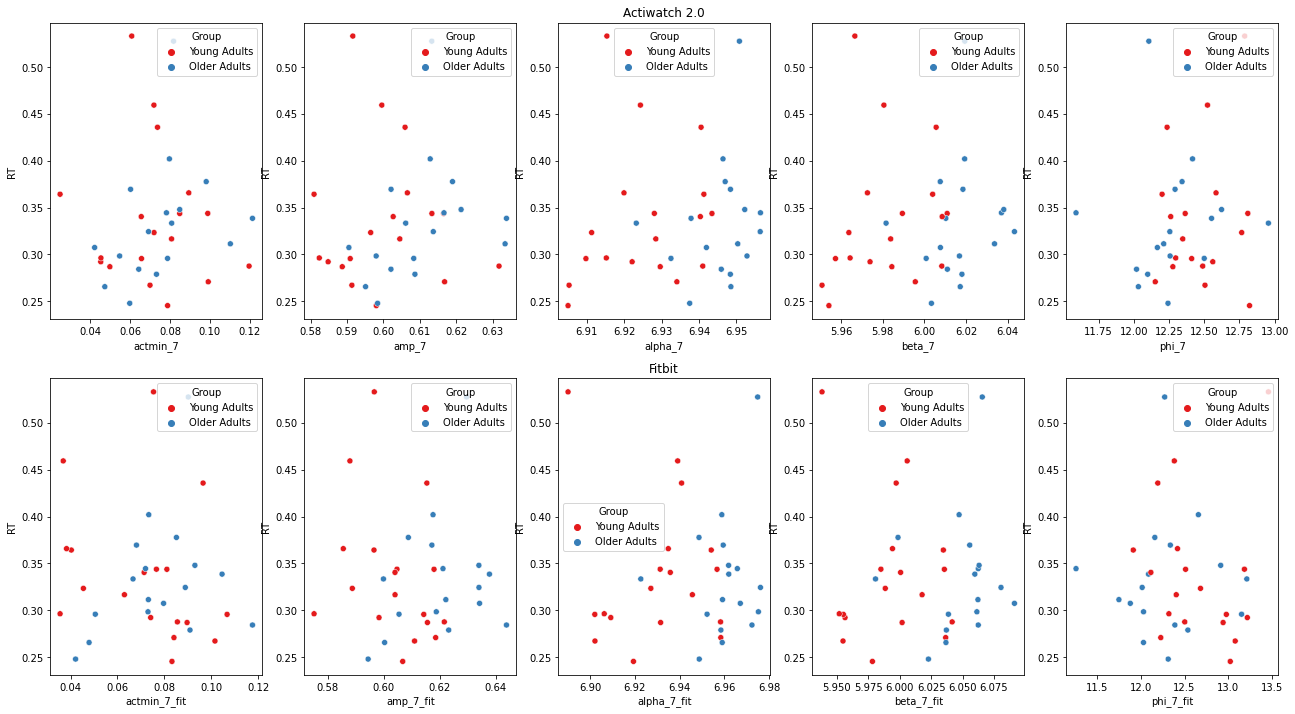

In [152]:
fig, axes = plt.subplots(2,5, figsize=(22,12))

sns.scatterplot(data=df[(df['RT'] < 500)], x='actmin_7', y='RT', hue='Group', ax=axes[0, 0])
sns.scatterplot(data=df[(df['RT'] < 500)], x='amp_7', y='RT', hue='Group', ax=axes[0, 1])
sns.scatterplot(data=df[(df['RT'] < 500)], x='alpha_7', y='RT', hue='Group', ax=axes[0, 2]).set(
title='Actiwatch 2.0')
sns.scatterplot(data=df[(df['RT'] < 500)], x='beta_7', y='RT', hue='Group', ax=axes[0, 3])
sns.scatterplot(data=df[df['RT'] < 500], x='phi_7', y='RT', hue='Group', ax=axes[0, 4])

sns.scatterplot(data=df[(df['RT'] < 500)], x='actmin_7_fit', y='RT', hue='Group', ax=axes[1, 0])
sns.scatterplot(data=df[(df['RT'] < 500)], x='amp_7_fit', y='RT', hue='Group', ax=axes[1, 1])
sns.scatterplot(data=df[(df['RT'] < 500)], x='alpha_7_fit', y='RT', hue='Group', ax=axes[1, 2]).set(
title='Fitbit')
sns.scatterplot(data=df[(df['RT'] < 500)], x='beta_7_fit', y='RT', hue='Group', ax=axes[1, 3])
sns.scatterplot(data=df[df['RT'] < 500], x='phi_7_fit', y='RT', hue='Group', ax=axes[1, 4])


<AxesSubplot:xlabel='M10_fit', ylabel='RT'>

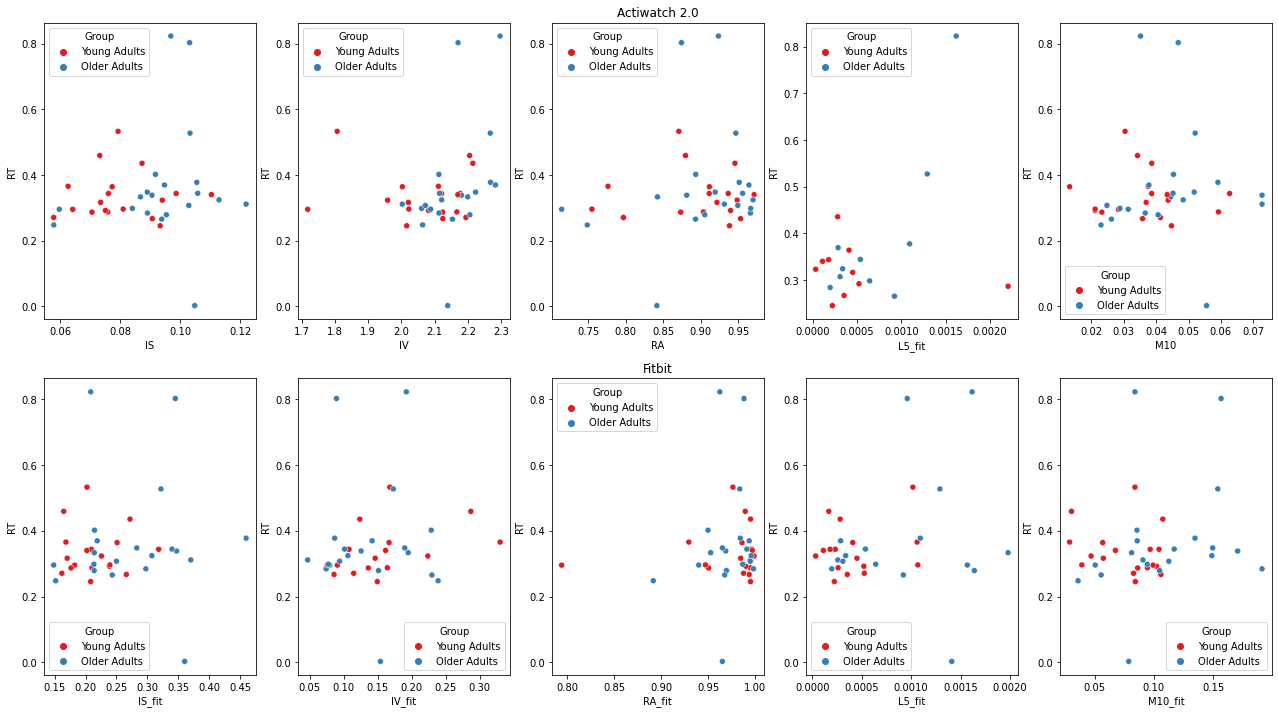

In [114]:
fig, axes = plt.subplots(2,5, figsize=(22,12))

sns.scatterplot(data=df[(df['RT'] < 500)], x='IS', y='RT', hue='Group', ax=axes[0, 0])
sns.scatterplot(data=df[(df['RT'] < 500)], x='IV', y='RT', hue='Group', ax=axes[0, 1])
sns.scatterplot(data=df[(df['RT'] < 500)], x='RA', y='RT', hue='Group', ax=axes[0, 2]).set(
title='Actiwatch 2.0')
sns.scatterplot(data=df[(df['RT'] < 500) & (df['L5'] < .002)], x='L5_fit', y='RT', hue='Group', ax=axes[0, 3])
sns.scatterplot(data=df[df['RT'] < 500], x='M10', y='RT', hue='Group', ax=axes[0, 4])

sns.scatterplot(data=df[(df['RT'] < 500)], x='IS_fit', y='RT', hue='Group', ax=axes[1, 0])
sns.scatterplot(data=df[(df['RT'] < 500)], x='IV_fit', y='RT', hue='Group', ax=axes[1, 1])
sns.scatterplot(data=df[(df['RT'] < 500)], x='RA_fit', y='RT', hue='Group', ax=axes[1, 2]).set(
title='Fitbit')
sns.scatterplot(data=df[(df['RT'] < 500) & (df['L5_fit'] < .002)], x='L5_fit', y='RT', hue='Group', ax=axes[1, 3])
sns.scatterplot(data=df[df['RT'] < 500], x='M10_fit', y='RT', hue='Group', ax=axes[1, 4])

<AxesSubplot:xlabel='phi_7_fit', ylabel='FS'>

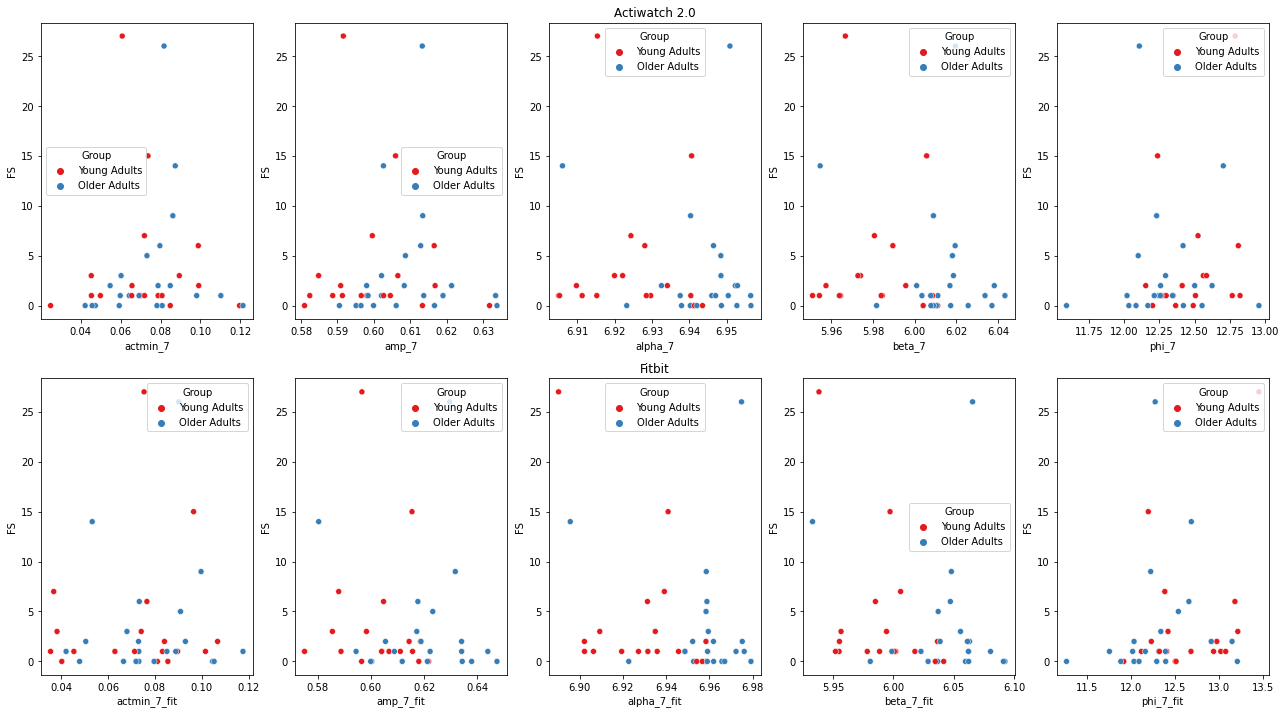

In [153]:
fig, axes = plt.subplots(2,5, figsize=(22,12))

sns.scatterplot(data=df[(df['FS'] < 500)], x='actmin_7', y='FS', hue='Group', ax=axes[0, 0])
sns.scatterplot(data=df[(df['FS'] < 500)], x='amp_7', y='FS', hue='Group', ax=axes[0, 1])
sns.scatterplot(data=df[(df['FS'] < 500)], x='alpha_7', y='FS', hue='Group', ax=axes[0, 2]).set(
title='Actiwatch 2.0')
sns.scatterplot(data=df[(df['FS'] < 500)], x='beta_7', y='FS', hue='Group', ax=axes[0, 3])
sns.scatterplot(data=df[df['FS'] < 500], x='phi_7', y='FS', hue='Group', ax=axes[0, 4])

sns.scatterplot(data=df[(df['FS'] < 500)], x='actmin_7_fit', y='FS', hue='Group', ax=axes[1, 0])
sns.scatterplot(data=df[(df['FS'] < 500)], x='amp_7_fit', y='FS', hue='Group', ax=axes[1, 1])
sns.scatterplot(data=df[(df['FS'] < 500)], x='alpha_7_fit', y='FS', hue='Group', ax=axes[1, 2]).set(
title='Fitbit')
sns.scatterplot(data=df[(df['FS'] < 500)], x='beta_7_fit', y='FS', hue='Group', ax=axes[1, 3])
sns.scatterplot(data=df[df['FS'] < 500], x='phi_7_fit', y='FS', hue='Group', ax=axes[1, 4])


<AxesSubplot:xlabel='M10_fit', ylabel='FS'>

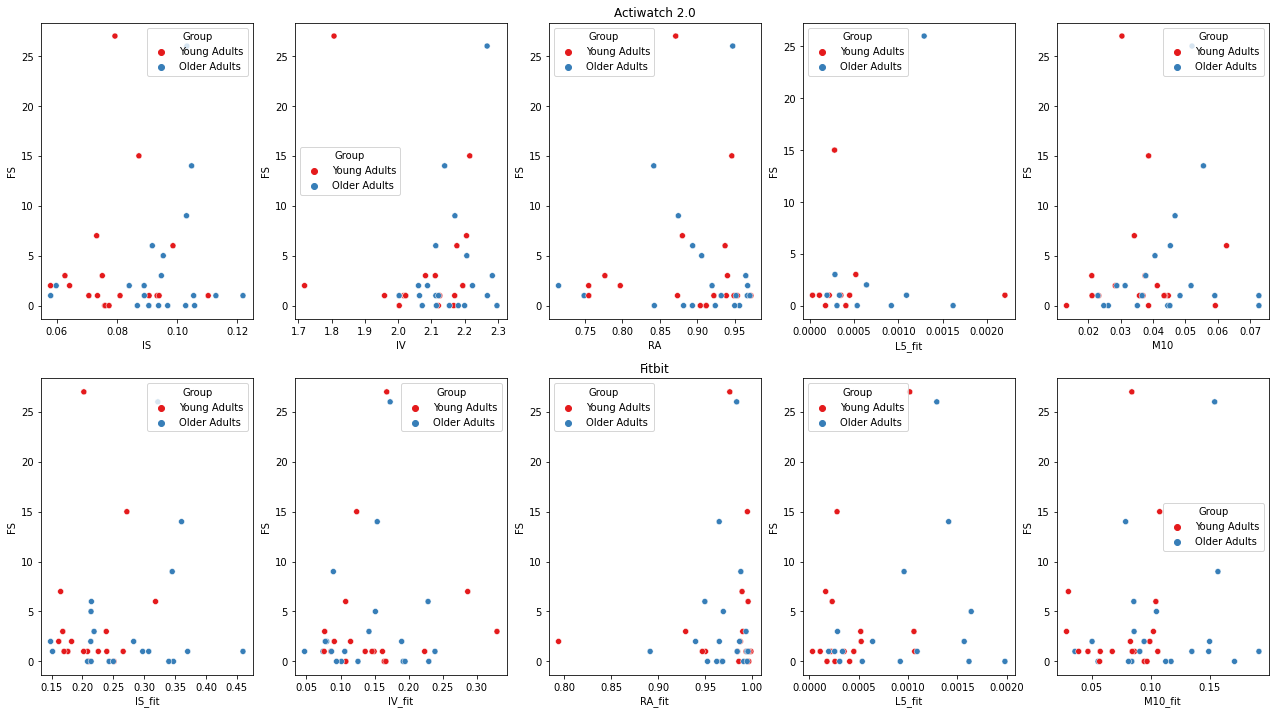

In [115]:
fig, axes = plt.subplots(2,5, figsize=(22,12))

sns.scatterplot(data=df[(df['FS'] < 500)], x='IS', y='FS', hue='Group', ax=axes[0, 0])
sns.scatterplot(data=df[(df['FS'] < 500)], x='IV', y='FS', hue='Group', ax=axes[0, 1])
sns.scatterplot(data=df[(df['FS'] < 500)], x='RA', y='FS', hue='Group', ax=axes[0, 2]).set(
title='Actiwatch 2.0')
sns.scatterplot(data=df[(df['FS'] < 500) & (df['L5'] < .002)], x='L5_fit', y='FS', hue='Group', ax=axes[0, 3])
sns.scatterplot(data=df[df['FS'] < 500], x='M10', y='FS', hue='Group', ax=axes[0, 4])

sns.scatterplot(data=df[(df['FS'] < 500)], x='IS_fit', y='FS', hue='Group', ax=axes[1, 0])
sns.scatterplot(data=df[(df['FS'] < 500)], x='IV_fit', y='FS', hue='Group', ax=axes[1, 1])
sns.scatterplot(data=df[(df['FS'] < 500)], x='RA_fit', y='FS', hue='Group', ax=axes[1, 2]).set(
title='Fitbit')
sns.scatterplot(data=df[(df['FS'] < 500) & (df['L5_fit'] < .002)], x='L5_fit', y='FS', hue='Group', ax=axes[1, 3])
sns.scatterplot(data=df[df['FS'] < 500], x='M10_fit', y='FS', hue='Group', ax=axes[1, 4])